In [4]:
pip install OpenCv-python

  Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.6 MB 280.5 kB/s eta 0:02:18
   ---------------------------------------- 0.1/38.6 MB 327.7 kB/s eta 0:01:58
   ---------------------------------------- 0.1/38.6 MB 364.4 kB/s eta 0:01:46
   ---------------------------------------- 0.1/38.6 MB 313.8 kB/s eta 0:02:03
   ---------------------------------------- 0.2/38.6 MB 436.9 kB/s eta 0:01:29
   ---------------------------------------- 0.2/38.6 MB 406.9 kB/s eta 0:01:35
   ---------------------------------------- 0.2/38.6 MB 406.9 kB/s eta 0:01:35
   ---------------

In [5]:
import cv2

In [6]:
import tensorflow as tf

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

#model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as k
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.layers import Dropout,Flatten,Activation
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization

import tensorflow as tf
import random as rn

import cv2
import numpy as np
from tqdm import tqdm
import os
from random import shuffle
from zipfile import ZipFile
from PIL import Image

In [8]:
X=[]
Z=[]
IMG_SIZE=150


FLOWER_DAISEY_DIR="C:\\Users\\prasa\\Downloads\\archive (4)\\soc\\train\\daisy"
FLOWER_SUNFLOWER_DIR="C:\\Users\\prasa\\Downloads\\archive (4)\\soc\\train\\sunflower"
FLOWER_TULIP_DIR="C:\\Users\\prasa\\Downloads\\archive (4)\\soc\\train\\tulip"
FLOWER_DANDI_DIR="C:\\Users\\prasa\\Downloads\\archive (4)\\soc\\train\\dandelion"
FLOWER_ROSE_DIR="C:\\Users\\prasa\\Downloads\\archive (4)\\soc\\train\\rose"

In [9]:
def assign_label(img, flower_type):
  return flower_type

In [10]:
# tqdm --> It creates a progress bar from the loop
def make_train_data(flower_type, DIR):
  for img in tqdm(os.listdir(DIR)):
    label = assign_label(img, flower_type)
    path = os.path.join(DIR, img)
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

    X.append(np.array(img))
    Z.append(str(label))

In [11]:
make_train_data('Daisy', FLOWER_DAISEY_DIR)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 501/501 [00:03<00:00, 151.86it/s]

501


In [12]:
make_train_data('Sunflower', FLOWER_SUNFLOWER_DIR)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 495/495 [00:03<00:00, 136.76it/s]

996


In [13]:
make_train_data('Tulip', FLOWER_TULIP_DIR)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 607/607 [00:04<00:00, 137.53it/s]

1603


In [14]:
make_train_data('Dandelion', FLOWER_DANDI_DIR)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 646/646 [00:04<00:00, 157.95it/s]

2249


In [15]:
make_train_data('Rose', FLOWER_ROSE_DIR)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 497/497 [00:03<00:00, 153.49it/s]

2746


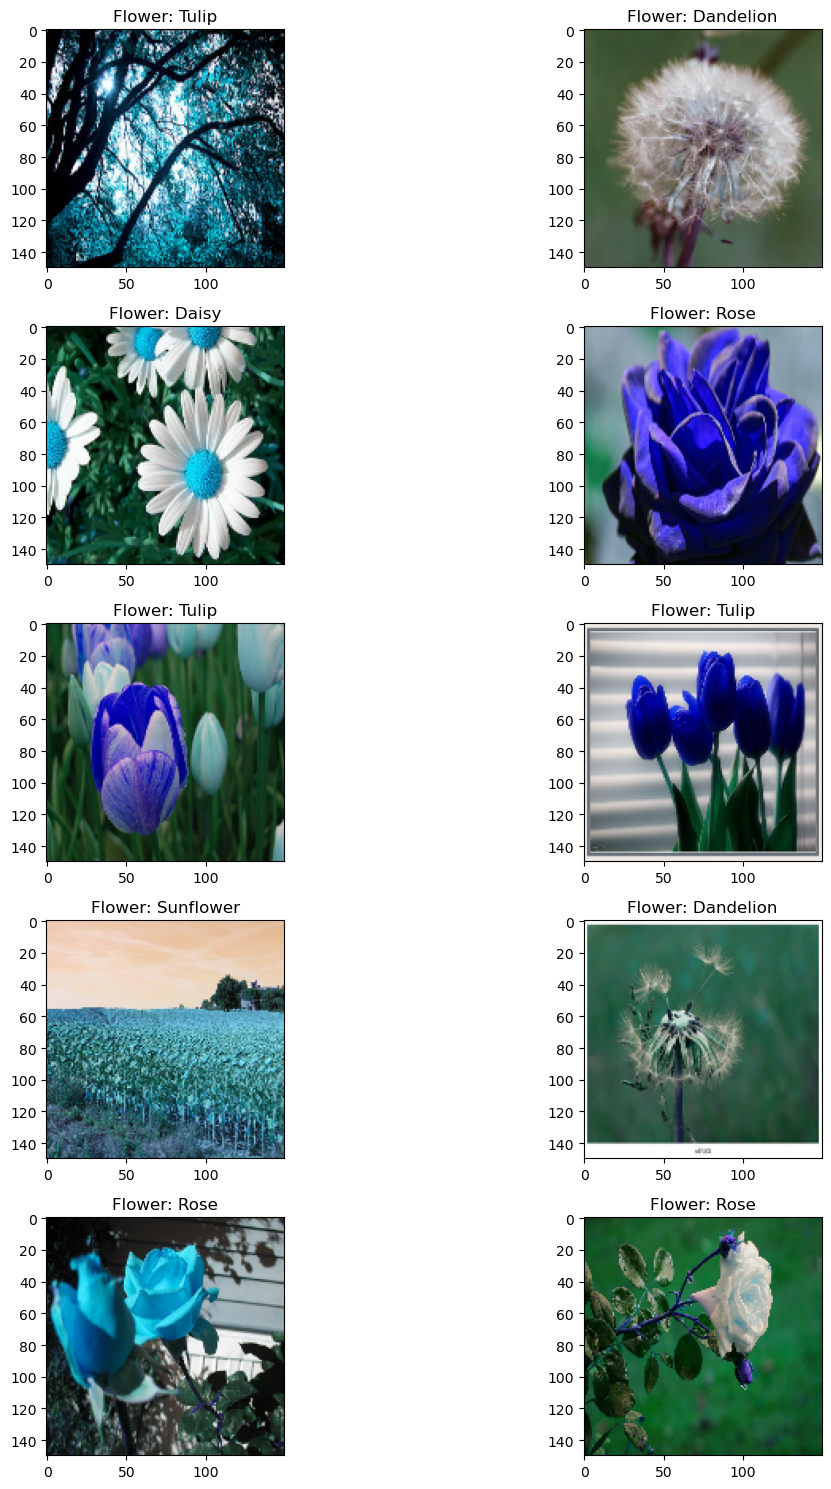

In [17]:
fig, ax = plt.subplots(5, 2)
fig.set_size_inches(15, 15)

for row in range(5):
  for col in range(2):
    l= rn.randint(0, len(Z))
    ax[row, col].imshow(X[l])
    ax[row, col].set_title("Flower: "+Z[l])

  plt.tight_layout()

In [18]:
mnist=tf.keras.datasets.mnist

In [19]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from 'C:\\Users\\prasa\\Contacts\\anaconda\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>

In [20]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train,x_test=x_train/255.0,x_test/255.0

11490434/11490434 [==============================] - 134s 12us/step


In [21]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax'),
])

In [22]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [23]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5


1875/1875 [==============================] - 15s 7ms/step - loss: 0.2969 - accuracy: 0.9150
Epoch 2/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1424 - accuracy: 0.9581
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1073 - accuracy: 0.9675
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0855 - accuracy: 0.9734
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0735 - accuracy: 0.9772


In [24]:
test_loss,test_accuracy=model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0770 - accuracy: 0.9757


In [25]:
print(test_loss)
print(test_accuracy)

0.07695594429969788
0.9757000207901001


In [26]:
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing.image import load_img,img_to_array
import matplotlib.pyplot as plt
import numpy as np

In [28]:
image_path="C:\\Users\\prasa\\Pictures\\img-0605xib.jpg"
original_image=load_img(image_path,target_size=(224,224))
original_array=img_to_array(original_image)
original_array=original_array/255.0
print(original_array)

[[[0.19607843 0.4509804  0.60784316]
  [0.2        0.45490196 0.6117647 ]
  [0.2        0.45490196 0.61960787]
  ...
  [0.46666667 0.6901961  0.80784315]
  [0.46666667 0.6901961  0.80784315]
  [0.45882353 0.68235296 0.8       ]]

 [[0.19607843 0.4509804  0.60784316]
  [0.19607843 0.4509804  0.60784316]
  [0.2        0.45490196 0.61960787]
  ...
  [0.46666667 0.6901961  0.80784315]
  [0.4627451  0.6862745  0.8039216 ]
  [0.4627451  0.6862745  0.8039216 ]]

 [[0.19607843 0.4509804  0.60784316]
  [0.2        0.45490196 0.6117647 ]
  [0.2        0.45490196 0.6117647 ]
  ...
  [0.47058824 0.6862745  0.80784315]
  [0.47058824 0.6862745  0.80784315]
  [0.47058824 0.6862745  0.80784315]]

 ...

 [[0.7490196  0.6039216  0.25882354]
  [0.7372549  0.6        0.24705882]
  [0.7882353  0.654902   0.3019608 ]
  ...
  [0.38039216 0.38039216 0.37254903]
  [0.44313726 0.38431373 0.30980393]
  [0.4862745  0.39215687 0.25882354]]

 [[0.75686276 0.6117647  0.2627451 ]
  [0.74509805 0.6        0.24313726]


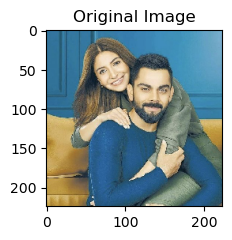

In [29]:
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(original_array)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 1)       28        
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 111, 111, 1)       0         
 g2D)                                                            
                                                                 
Total params: 28 (112.00 Byte)
Trainable params: 28 (112.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 105ms/step


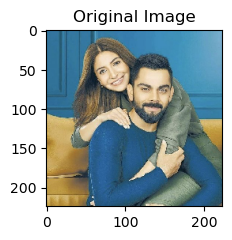

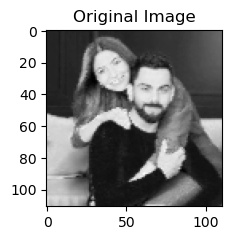

In [36]:
#convert image to grey scale
model=models.Sequential()

#Sequentials--> It allows us to create a
model.add(layers.Conv2D(1,(3,3),activation='relu',input_shape=(224,224,3)))
#Conv2D-->It converts 2D conventional layer

#Conventional Layer--= it is used to perform element wise multiplication or addition or division etc....
#(3,3)--> set the size of the filter
#(224,224,3)-->224x224-->pixel with 3 color channel(RGB)

model.add(layers.MaxPooling2D((2,2)))
#MaxPooling2D()--> it is used to set the dimensions of input data and extract imprtant features from Conv2D layer
model.summary()

#TO reshape the image
input_image=np.expand_dims(original_array,axis=0)
greyscale=model.predict(input_image)

plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(original_array)

plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(np.squeeze(greyscale),cmap='gray')